# Project Name : TWEET POSITIVE/NEGATIVE Detection

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import string
import matplotlib.pyplot as plt
import seaborn as sns

## Read The Dataset

In [2]:
data = pd.read_csv("Apple_tweets.csv")
data

,Tweet,Avg
0,"I have to say, Apple has by far the best custo...",2.0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0
2,LOVE U @APPLE,1.8
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8
4,.@apple has the best customer service. In and ...,1.8
...,...,...
1176,freak @apple,-2.0
1177,WHY CANT I freakING SEE PICTURES ON MY TL IM A...,-2.0
1178,@APPLE YOU freakING COWS freak YOU,-2.0
1179,@apple I hate you why is my phone not working ...,-2.0


## Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tweet   1181 non-null   object 
 1   Avg     1181 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.6+ KB


In [4]:
data['Length'] = data['Tweet'].apply(len)

In [5]:
data

,Tweet,Avg,Length
0,"I have to say, Apple has by far the best custo...",2.0,101
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0,60
2,LOVE U @APPLE,1.8,13
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8,91
4,.@apple has the best customer service. In and ...,1.8,82
...,...,...,...
1176,freak @apple,-2.0,12
1177,WHY CANT I freakING SEE PICTURES ON MY TL IM A...,-2.0,78
1178,@APPLE YOU freakING COWS freak YOU,-2.0,34
1179,@apple I hate you why is my phone not working ...,-2.0,68


In [6]:
data.groupby('Avg').count()

,Tweet,Length
Avg,,
-2.0,17,17
-1.8,22,22
-1.6,9,9
-1.4,23,23
-1.2,39,39
-1.0,72,72
-0.8,76,76
-0.6,72,72
-0.4,84,84


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [7]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords') 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dulesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dulesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


__Defining functions to perform the Preprocessing__

In [9]:
def remove_punct(text):
    
    text = "".join([char for char in text if char not in string.punctuation])
    return text

data['text_clean'] = data['Tweet'].apply(lambda x: remove_punct(x))

data.head()

,Tweet,Avg,Length,text_clean
0,"I have to say, Apple has by far the best custo...",2.0,101,I have to say Apple has by far the best custom...
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0,60,iOS 7 is so fricking smooth beautiful ThanxAp...
2,LOVE U @APPLE,1.8,13,LOVE U APPLE
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8,91,Thank you apple loving my new iPhone 5S apple...
4,.@apple has the best customer service. In and ...,1.8,82,apple has the best customer service In and out...


In [10]:
def lower_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    return ' '.join(text)

data['text_clean'] = data['text_clean'].apply(lambda x: lower_text(x))
data.head()

,Tweet,Avg,Length,text_clean
0,"I have to say, Apple has by far the best custo...",2.0,101,i have to say apple has by far the best custom...
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0,60,ios 7 is so fricking smooth beautiful thanxapp...
2,LOVE U @APPLE,1.8,13,love u apple
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8,91,thank you apple loving my new iphone 5s apple ...
4,.@apple has the best customer service. In and ...,1.8,82,apple has the best customer service in and out...


In [11]:
def remove_special(text):
    y1 = []
    words = word_tokenize(text)
    for word in words:
        if word.isalnum():
            y1.append(word)
    return ' '.join(y1)

data['text_clean'] = data['text_clean'].apply(lambda x: remove_special(x))
data.head()

,Tweet,Avg,Length,text_clean
0,"I have to say, Apple has by far the best custo...",2.0,101,i have to say apple has by far the best custom...
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0,60,ios 7 is so fricking smooth beautiful thanxapp...
2,LOVE U @APPLE,1.8,13,love u apple
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8,91,thank you apple loving my new iphone 5s apple ...
4,.@apple has the best customer service. In and ...,1.8,82,apple has the best customer service in and out...


In [12]:
def remove_stop(text):
    y1 = []
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            y1.append(word)
    return ' '.join(y1)

data['text_clean'] = data['text_clean'].apply(lambda x: remove_stop(word_tokenize(x)))
data.head()

,Tweet,Avg,Length,text_clean
0,"I have to say, Apple has by far the best custo...",2.0,101,say apple far best customer care service ever ...
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0,60,ios 7 fricking smooth beautiful thanxapple apple
2,LOVE U @APPLE,1.8,13,love u apple
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8,91,thank apple loving new iphone 5s apple iphone5...
4,.@apple has the best customer service. In and ...,1.8,82,apple best customer service new phone 10min


In [13]:
def stem(text):
    ps = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [ps.stem(word) for word in words]
    return " ".join(stemmed_words)

data['text_clean'] = data['text_clean'].apply(lambda x: stem(x))
data.head()

,Tweet,Avg,Length,text_clean
0,"I have to say, Apple has by far the best custo...",2.0,101,say appl far best custom care servic ever rece...
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0,60,io 7 frick smooth beauti thanxappl appl
2,LOVE U @APPLE,1.8,13,love u appl
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8,91,thank appl love new iphon 5s appl iphone5 pict...
4,.@apple has the best customer service. In and ...,1.8,82,appl best custom servic new phone 10min


### Feature Selection

In [14]:
x = data['text_clean'].values
y = data['Avg'].values
print(x)

['say appl far best custom care servic ever receiv appl appstor'
 'io 7 frick smooth beauti thanxappl appl' 'love u appl' ...
 'appl freak cow freak' 'appl hate phone work im go freak'
 'agounalaki that nasti appl nasti brat']


In [15]:
Avg=[]
for i in y:
    if (i>=0):
        y=('positive')
        Avg.append(y)   
    else:
        y=('negative')
        Avg.append(y)

In [16]:
Avg

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',

## EDA

In [31]:
pos_count = Avg.count('positive')
neg_count = Avg.count('negative')

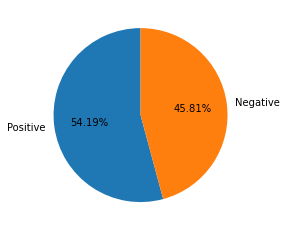

In [32]:
labels = ['Positive', 'Negative']
sizes = [pos_count, neg_count]
plt.figure(figsize=(16,4))
plt.pie(sizes, labels=labels, autopct='%0.2f%%', startangle=90);

In [35]:
data["Target"] = Avg

In [39]:
data.head(2)

,Tweet,Avg,Length,text_clean,Target
0,"I have to say, Apple has by far the best custo...",2.0,101,say appl far best custom care servic ever rece...,positive
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0,60,io 7 frick smooth beauti thanxappl appl,positive


__Number of Words__

In [41]:
data['num_words'] = data['Tweet'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,Tweet,Avg,Length,text_clean,Target,num_words
0,"I have to say, Apple has by far the best custo...",2.0,101,say appl far best custom care servic ever rece...,positive,23
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0,60,io 7 frick smooth beauti thanxappl appl,positive,14
2,LOVE U @APPLE,1.8,13,love u appl,positive,4
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8,91,thank appl love new iphon 5s appl iphone5 pict...,positive,20
4,.@apple has the best customer service. In and ...,1.8,82,appl best custom servic new phone 10min,positive,20


__Number of Sentences__

In [42]:
data['num_sentences'] = data['Tweet'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

,Tweet,Avg,Length,text_clean,Target,num_words,num_sentences
0,"I have to say, Apple has by far the best custo...",2.0,101,say appl far best custom care servic ever rece...,positive,23,2
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0,60,io 7 frick smooth beauti thanxappl appl,positive,14,2
2,LOVE U @APPLE,1.8,13,love u appl,positive,4,1
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8,91,thank appl love new iphon 5s appl iphone5 pict...,positive,20,2
4,.@apple has the best customer service. In and ...,1.8,82,appl best custom servic new phone 10min,positive,20,3


__Positive vs Negative on the basis of Number of characters__

C:\Users\dulesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


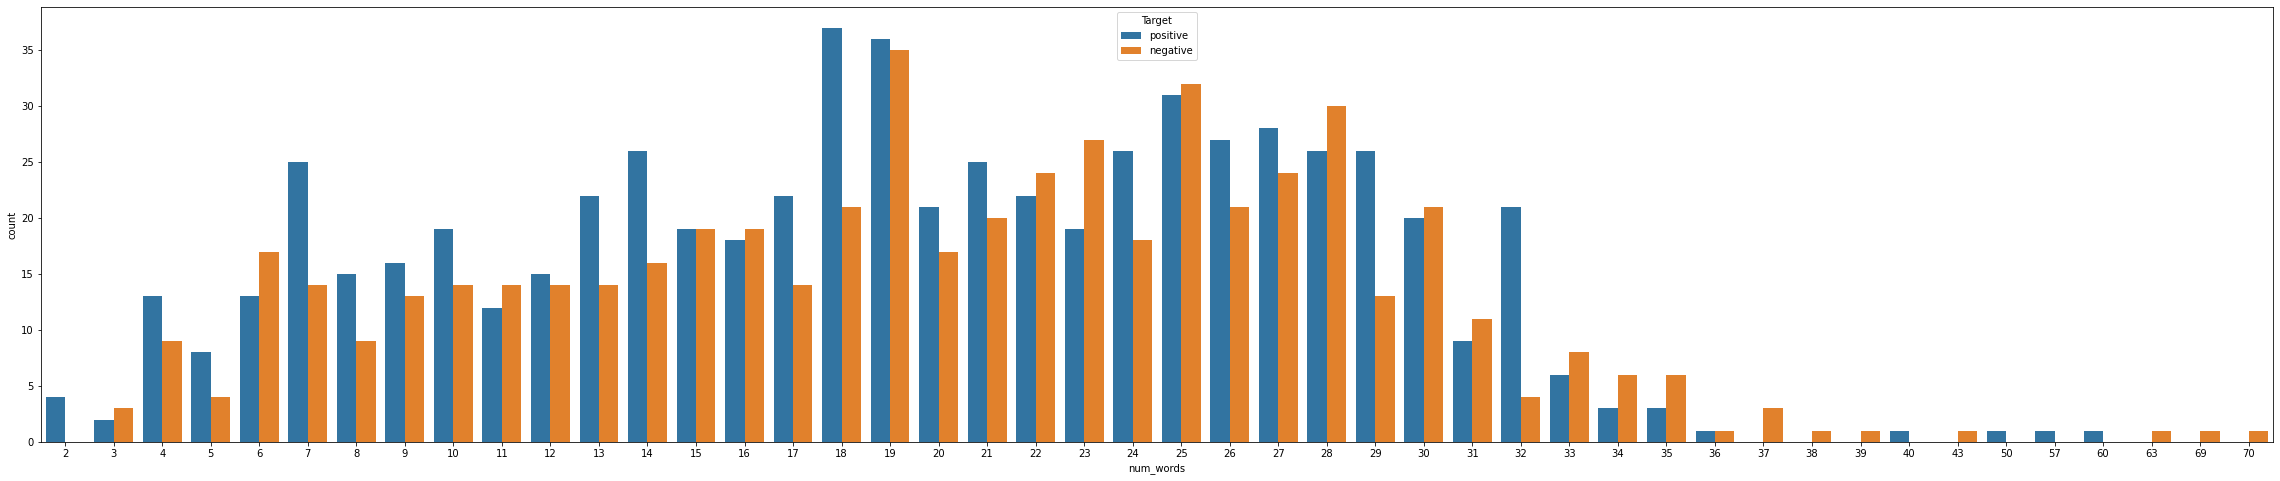

In [47]:
plt.figure(figsize=(40,8))
sns.countplot("num_words", data= data, hue="Target");

__Positive vs Negative on the basis of Number of Sentences__

C:\Users\dulesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


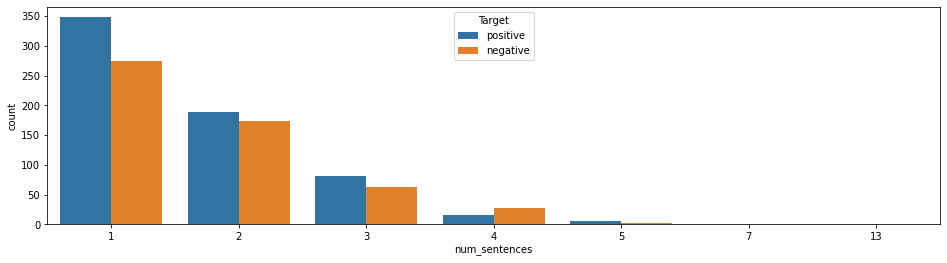

In [48]:
plt.figure(figsize=(16,4))
sns.countplot("num_sentences", data=data, hue="Target");

__From the above plots we can conclude that there is nothing to do with the number of characters, words, sentences in describibg the tweet as POSITIVE or NEGATIVE.__
<hr>

__Perform Train Test Split__

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, Avg, test_size=0.20, random_state=42)

In [18]:
CV = CountVectorizer(stop_words="english")

In [19]:
X_train_CV = CV.fit_transform(X_train)
X_train_CV

<944x2855 sparse matrix of type '<class 'numpy.int64'>'
	with 7945 stored elements in Compressed Sparse Row format>

In [20]:
NB = MultinomialNB(alpha=1)

In [21]:
NB.fit(X_train_CV,y_train)

MultinomialNB(alpha=1)

In [22]:
X_test_CV = CV.transform(X_test)
X_test_CV

<237x2855 sparse matrix of type '<class 'numpy.int64'>'
	with 1511 stored elements in Compressed Sparse Row format>

In [23]:
y_predict = NB.predict(X_test_CV)
y_predict

array(['negative', 'positive', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'positi

In [24]:
accuracyScore = accuracy_score(y_test,y_predict)

In [25]:
print("Prediction Accuracy :",accuracyScore)

Prediction Accuracy : 0.679324894514768


### Prediction

In [49]:
msg = input("Enter Message: ")
msgInput = CV.transform([msg])
predict = NB.predict(msgInput)
if(predict[0]=='positive'):
    print("------------------------POSITIVE TWEET---------------------------")
else:
    print("---------------------------NEGATIVE TWEET------------------------------")

Enter Message: We are glad to see India reaching Finals 
------------------------POSITIVE TWEET---------------------------


In [50]:
msg = input("Enter Message: ")
msgInput = CV.transform([msg])
predict = NB.predict(msgInput)
if(predict[0]=='positive'):
    print("------------------------POSITIVE TWEET---------------------------")
else:
    print("---------------------------NEGATIVE TWEET------------------------------")

Enter Message: keep this non sense away from children
---------------------------NEGATIVE TWEET------------------------------


__Hence we successfully tested our model for predicting the tweet as POSITIVE or NEGATIVE Tweet.__